## Tutorial - Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model relating $x$ to $y$.

In [4]:
#It's dangerous to go alone.  Take these!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.tools import add_constant
from scipy.optimize import minimize
from scipy.special import gammaln

df = pd.read_csv("./poisson_regression_data.csv")
df.head()

,x,y
0,0.232466,3
1,-0.370613,1
2,0.929731,4
3,0.356606,1
4,0.387176,2


### Definition:

You remember in regression problems, we used loss functions to estimate model parameters, where loss approaching 0 as the model gets better in predictions (e.g., minimizing MSE).

Log Likelihood value is a measure of goodness of fit for any model. Higher the value, better is the model fit. We can also use MLE (maximum likelihood estimation) to estimate parameters, where the log likelihood is maximized ('Negative Log Likelihood', negation of the logarithm of the probability of reproducing a given data set, is minimized).  

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

### Poisson Negative Log Likelihood

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum (its derivative with respect to $\lambda$ is zero), and so you can omit the $ \ln(y!)$ in your function.


Test your function by calling it with `lambda = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lambda=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

What happens when you set an element of lam to 0 or a negative number and why? 


In [7]:
def poissonNegLogLikelihood(lam,y):
   nll = -np.sum(y * np.log(lam) - lam) 

   return nll

lam = 1.3
y = np.array([2,1,0,0])
nll = poissonNegLogLikelihood(lam, y)
print(nll)

4.412907206597527


### Poisson Regression Negative Log Likelihood

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [10]:
def poissonRegressionNegLogLikelihood(b, X, y):
   lam = np.exp(X @ b)

   return poissonNegLogLikelihood(lam, y)

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])

print(poissonRegressionNegLogLikelihood(b, X, y))

3211.7843052468816


- Question1: In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?



- Question2: What might have happened had we just passed $\lambda = \mathbf{X}\beta$?



### Prediction

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  


In [15]:
def modelPrediction(b,X):
    y = np.exp(X @ b)

    return y

### Fit model

Write a function called `fitModel` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [11]:
def fitModel(X,y):
    # Need to give the optimizer a guess of where to start
    # Zeros sound good to me
    beta = np.zeros(X.shape[1])

    mle = minimize(poissonRegressionNegLogLikelihood, beta, args=(X,y))

    return mle.x

X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])
print(fitModel(X,y))

[ 0.94827556 -0.5295352 ]


### Negative Log Likelihood (NLL) estimation

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

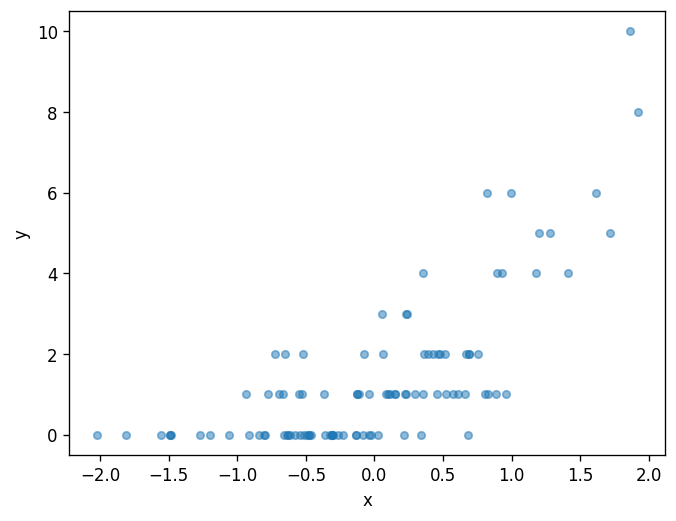

In [16]:

fig, ax = plt.subplots(dpi = 120)

df.plot.scatter('x', 'y', ax=ax, alpha = 0.5)

x = df.x.values
X = add_constant(x)
y = df.y.values

betas = fitModel(X,y)

x_new = np.linspace(-2,2,1001)
X_new = add_constant(x_new)

y_pred = modelPrediction(betas, X_new)


### Ordinary Least Squares (OLS) estimation

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.  Feel free to use `statsmodels` to fit the linear regression.

In [ ]:
model = sm.ols('y~x', data=df)

model = model.fit()

new_df = pd.DataFrame({
    'x': np.linspace(-2,2,1001) 
})

new_df['y_pred'] = model.predict(new_df)

fig, ax = plt.subplots(dpi= 120)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  

---



